In [35]:
#Lets install the required libraries

!pip3 install xgboost


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\AARIN SHEIK M\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [36]:
!pip install catboost


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\AARIN SHEIK M\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [37]:
!pip install lightgbm


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\AARIN SHEIK M\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [81]:
# All prerequisites libraries :

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split , GridSearchCV , RandomizedSearchCV
from sklearn.metrics import make_scorer

# for Pre-process the data
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 

# Models to train and check
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

#to export a final model for web implementation
import joblib
import matplotlib.pyplot as plt

# to ignore the warnings 
from warnings import filterwarnings
filterwarnings(action='ignore')

In [39]:

# load train and test data

train_df = pd.read_csv('../Dataset/train.csv')
test_df = pd.read_csv('../Dataset/test.csv')

In [40]:
train_df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [41]:
test_df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


---

# lets analysis the features :

1. rings - this is our target variable that we gonna predict (discrete variable)
2. sex - male , female , infant (categorical variable)
3. lenght - represents the longest measurement of the cell in mm (continous variable)
4. diameter - represents the diameter of cells in mm which is perpendicular to length (continous variable)
5. height - represents height of the cells in mm (continous variable)
6. whole weight - represents whole weigth of abalone cells in grams (continous variable)
7. whole weight.1 - represents sucked weight (only the meat) in grams (continous variable)
8. whole weight.2 - represents viscera weight after bleeding in grams (continous varaible)
9. shell weight - represents shell weight after been dried in grams (continous variable) 

---

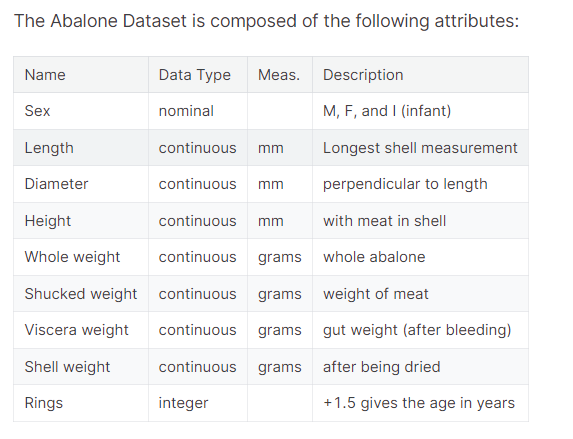

In [42]:
# performing some feature engineering functions

In [43]:
train_df.shape

(90615, 10)

In [44]:
test_df.shape

(60411, 9)

In [45]:
train_df.describe(include='all')

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
unique,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,33093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,45307.000000,NaN,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,26158.441658,NaN,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.000000,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,22653.500000,NaN,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,45307.000000,NaN,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,67960.500000,NaN,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000


In [46]:
train_df.corr()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
id,1.000000,0.004724,0.004290,0.005916,0.005228,0.004203,0.004878,0.005887,0.000938
Length,0.004724,1.000000,0.989732,0.916094,0.931449,0.909609,0.913134,0.911073,0.623786
Diameter,0.004290,0.989732,1.000000,0.919618,0.933848,0.908466,0.914668,0.917871,0.636832
Height,0.005916,0.916094,0.919618,1.000000,0.902344,0.861769,0.886132,0.904019,0.665772
Whole weight,0.005228,0.931449,0.933848,0.902344,1.000000,0.971249,0.974319,0.964201,0.617274
Whole weight.1,0.004203,0.909609,0.908466,0.861769,0.971249,1.000000,0.949227,0.911800,0.515067
Whole weight.2,0.004878,0.913134,0.914668,0.886132,0.974319,0.949227,1.000000,0.937069,0.588954
Shell weight,0.005887,0.911073,0.917871,0.904019,0.964201,0.911800,0.937069,1.000000,0.694766
Rings,0.000938,0.623786,0.636832,0.665772,0.617274,0.515067,0.588954,0.694766,1.000000


In [47]:
train_df.groupby('Rings').mean()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
Rings,,,,,,,,
1,41000.320000,0.503400,0.388600,0.126800,0.674380,0.302240,0.149420,0.198860
2,42199.241379,0.361034,0.269655,0.090172,0.289983,0.125810,0.060983,0.089034
3,47412.769430,0.221645,0.161088,0.051365,0.059079,0.023988,0.012755,0.016911
4,44784.159772,0.213884,0.156086,0.049802,0.050773,0.020602,0.011214,0.015131
5,44862.862683,0.270936,0.198597,0.065953,0.102477,0.042828,0.022022,0.029975
6,44984.072075,0.346544,0.259095,0.084803,0.210716,0.091697,0.044496,0.060950
7,45290.540853,0.406222,0.308246,0.099934,0.336611,0.149284,0.071012,0.095899
8,45376.710946,0.490331,0.377682,0.122791,0.593931,0.268343,0.126108,0.165046
9,45429.999656,0.550031,0.428072,0.141466,0.846608,0.382213,0.182581,0.232869


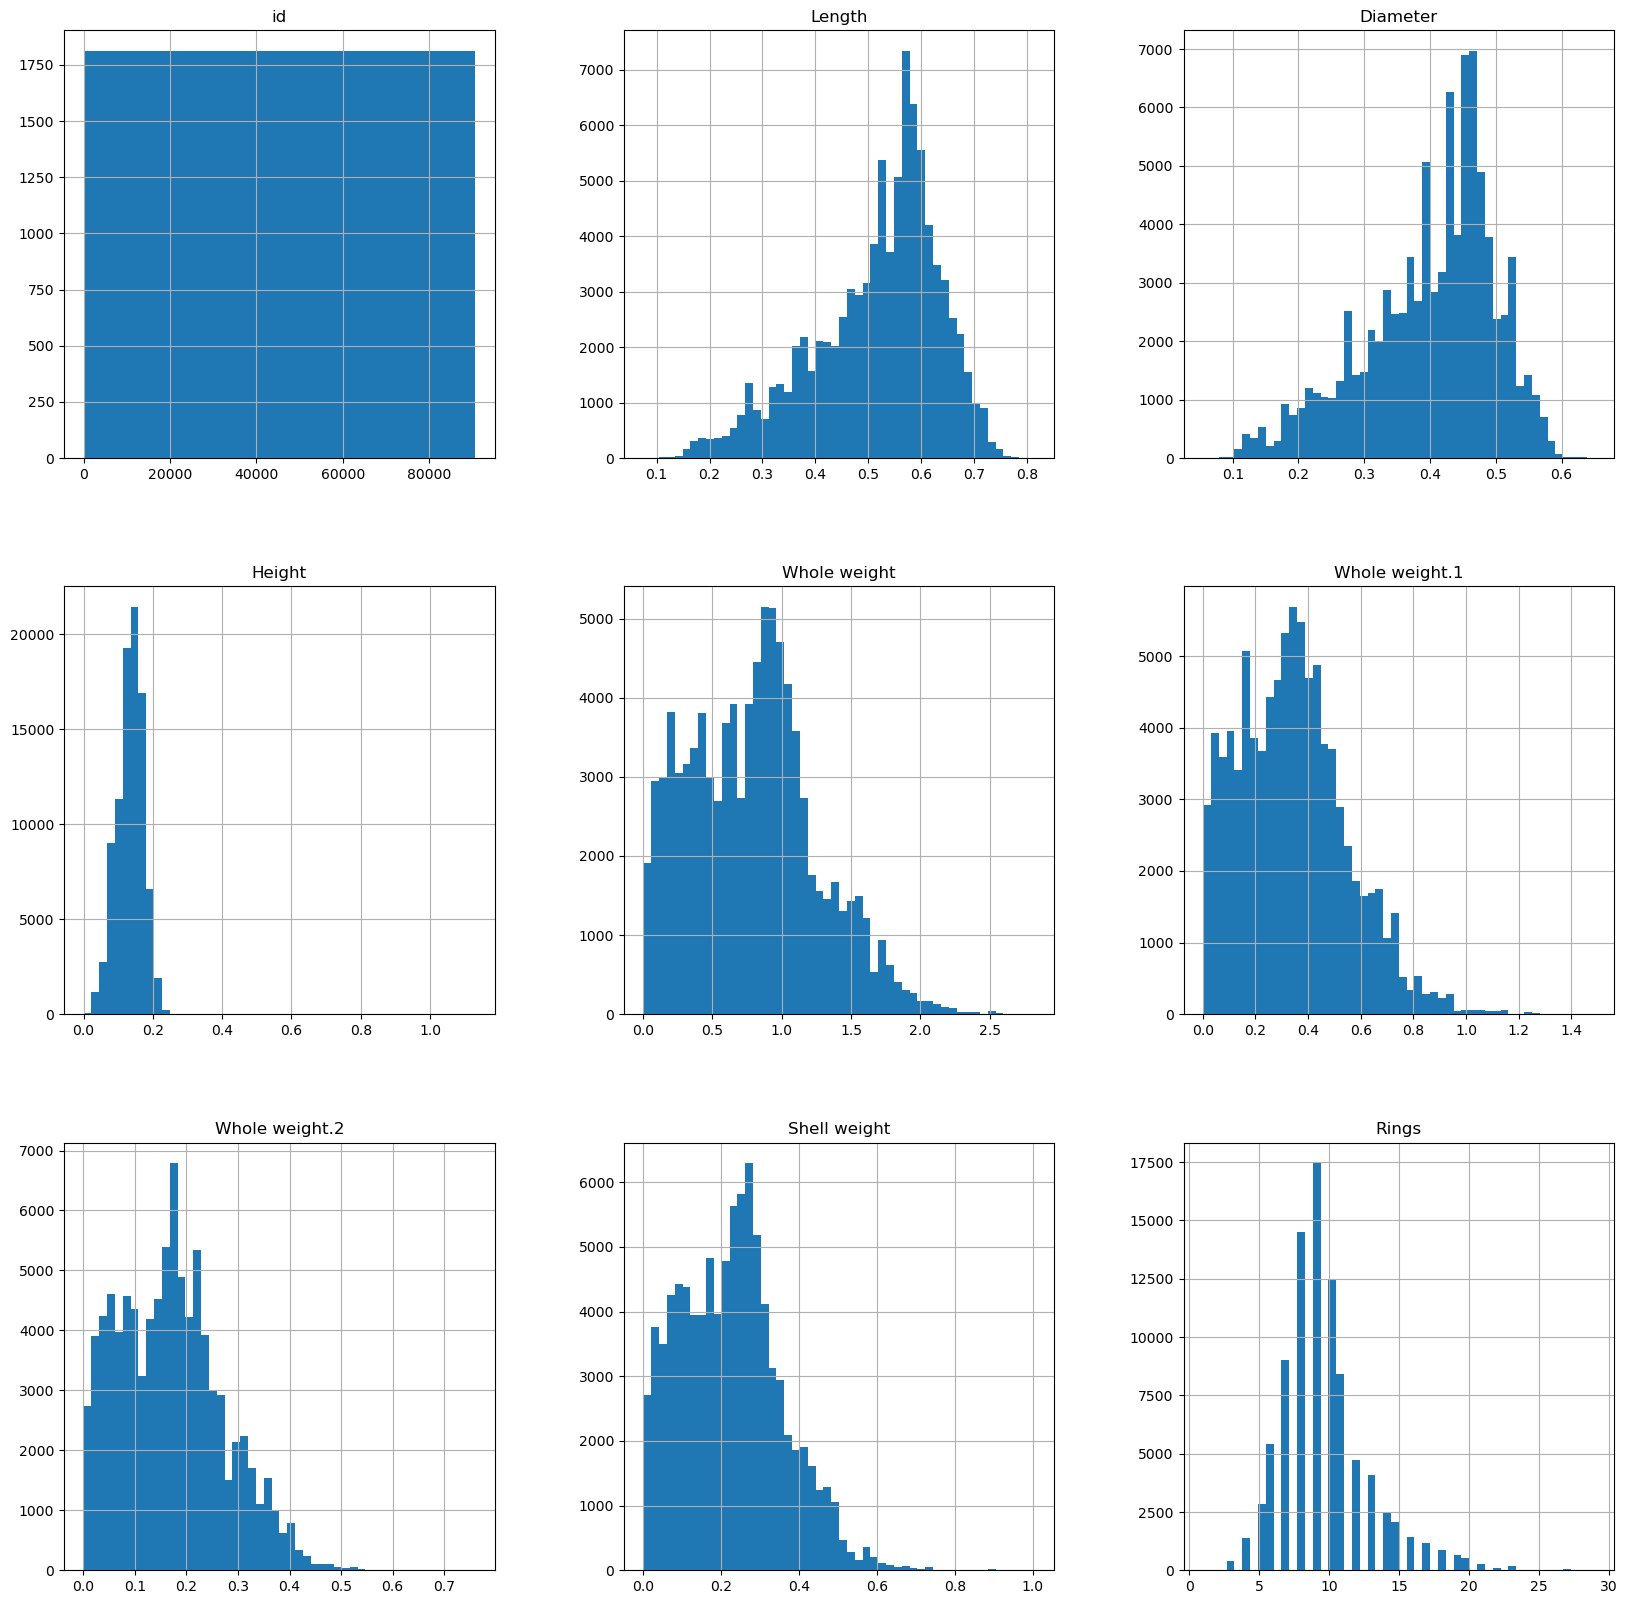

In [48]:
# Data Analysis :

train_df.hist(figsize=(20,20),bins=50)
plt.show()

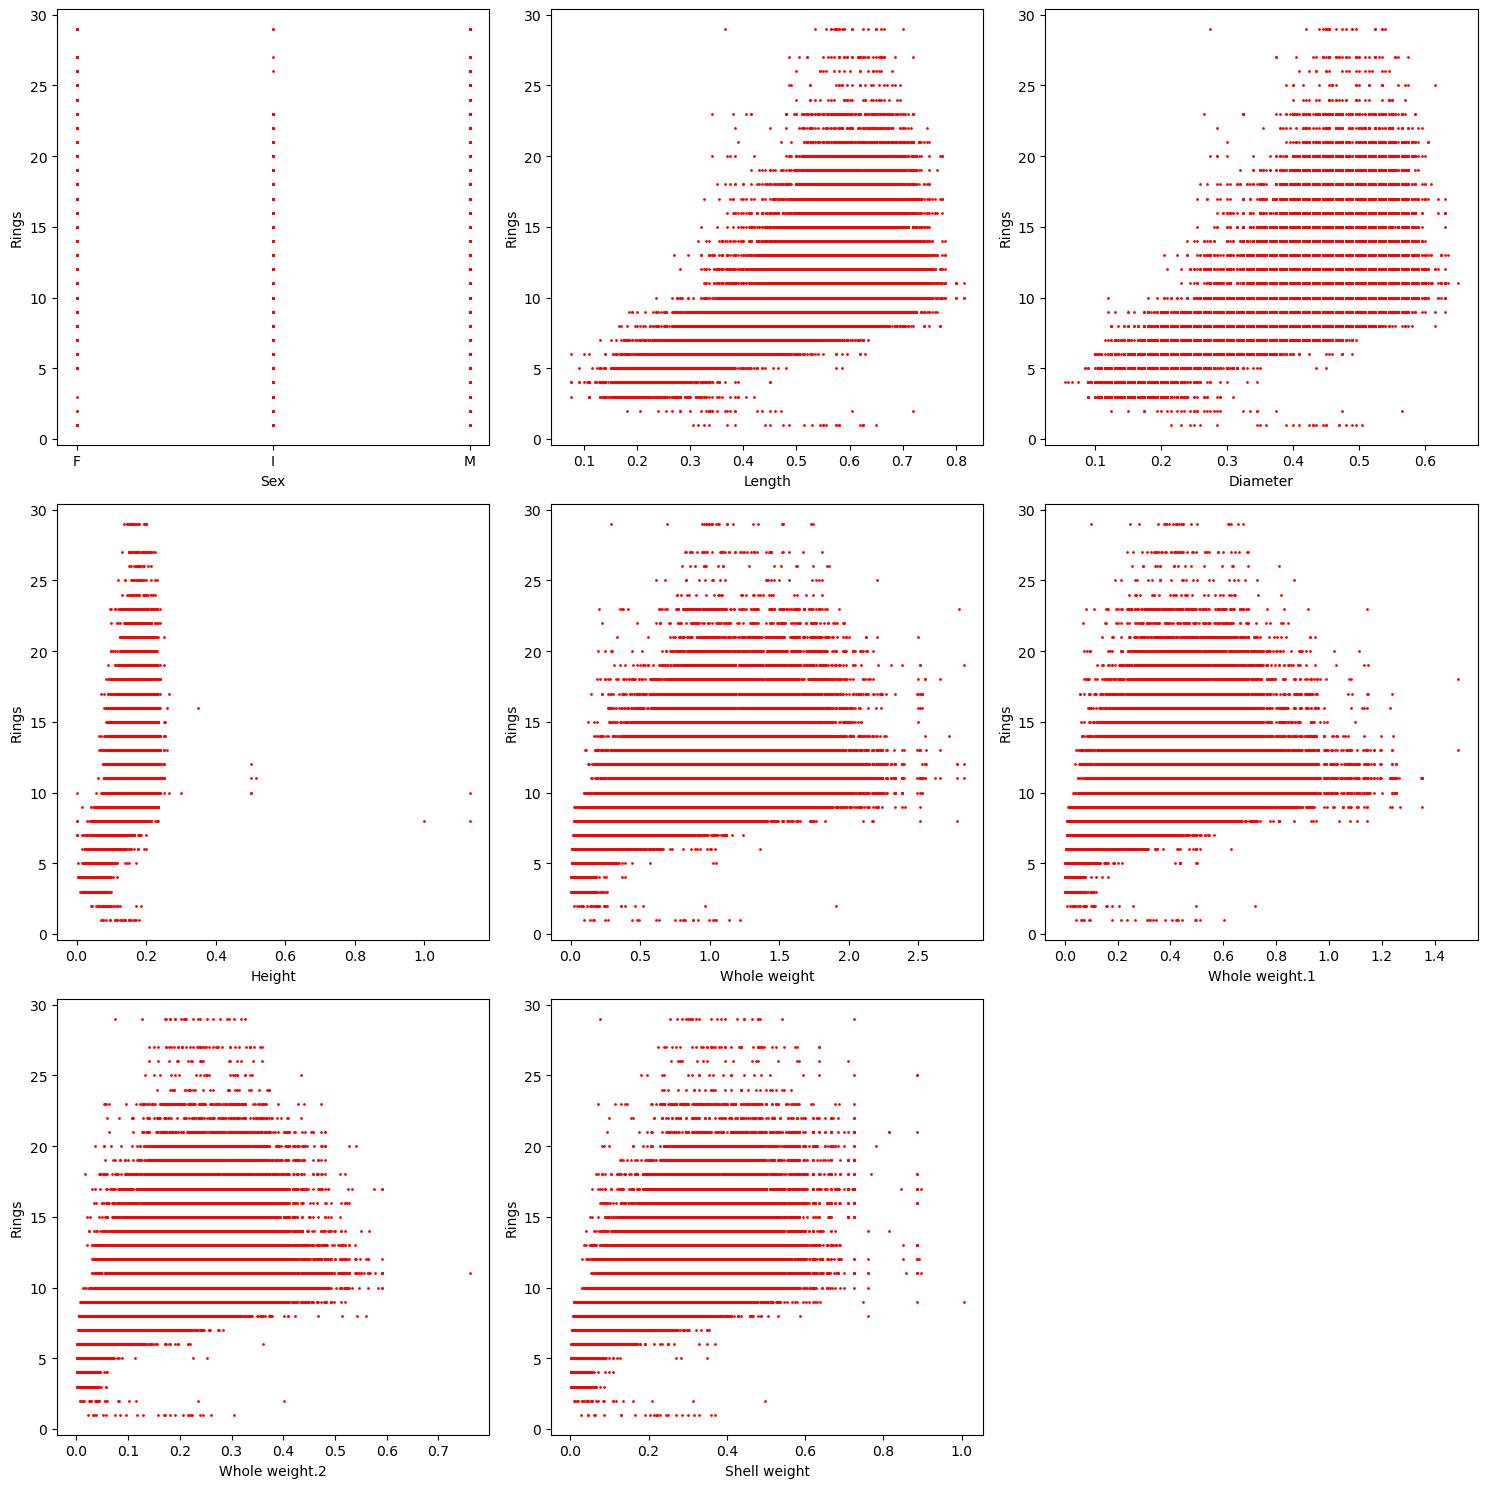

In [49]:
def show_scatter(ax, df, f1, f2):
    ax.scatter(df[f1], df[f2], color='red', s=1)
    ax.set_xlabel(f1)
    ax.set_ylabel(f2)

features = train_df.columns[1:-1]

# Create a figure and a set of subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Plot each feature against 'Rings'
for i, feature in enumerate(features):
    show_scatter(axs[i], train_df, feature, 'Rings')

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

<AxesSubplot:>

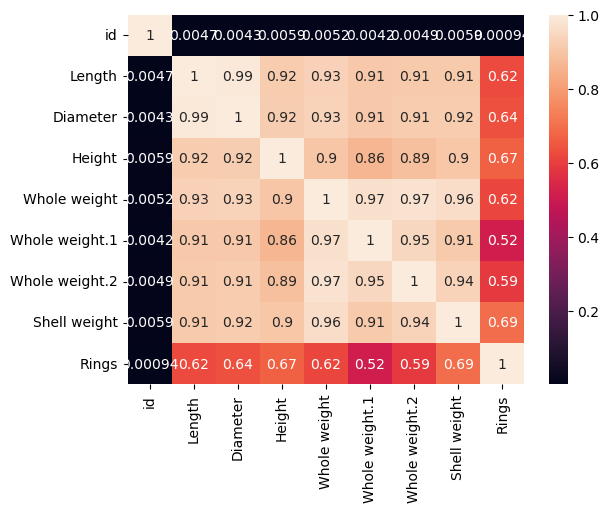

In [50]:
corr = train_df.corr()
sns.heatmap(corr,annot=True)

<AxesSubplot:xlabel='Sex', ylabel='Rings'>

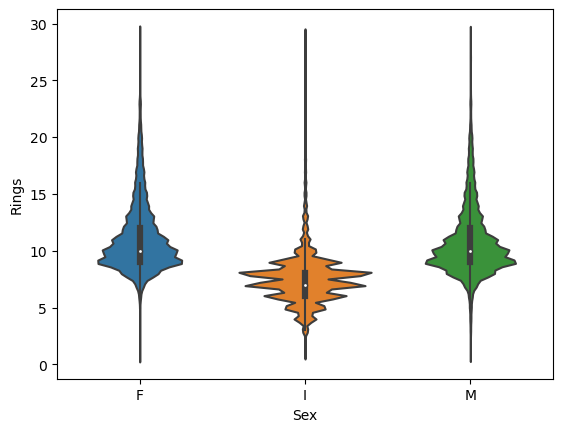

In [51]:
sns.violinplot(x='Sex', y='Rings', data=train_df)

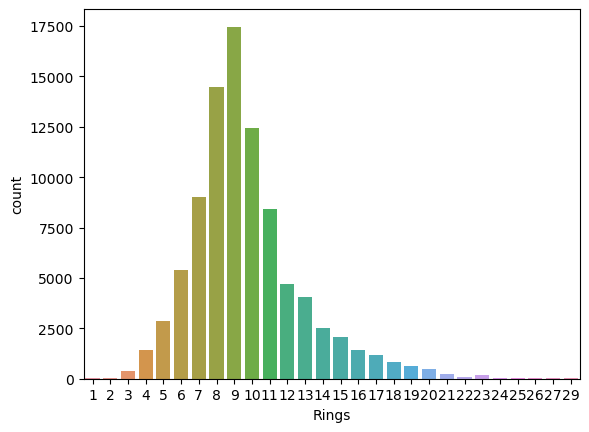

In [52]:
sns.countplot(train_df['Rings'])
plt.show()

In [53]:
# check for missing values 

train_df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

In [54]:
# check for duplicated values

duplicates = train_df.duplicated()
num_duplicates = duplicates.sum()

print("Number of duplicated rows : " , num_duplicates)

Number of duplicated rows :  0


<AxesSubplot:>

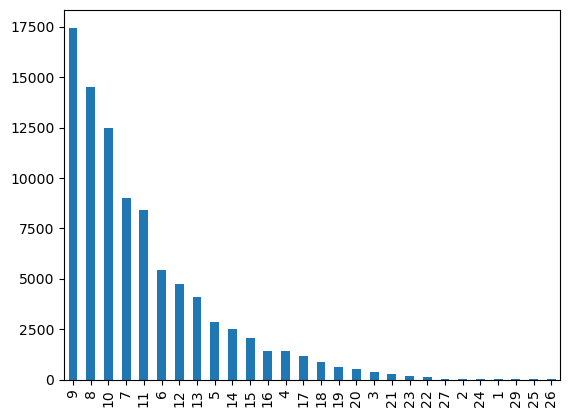

In [55]:
# visualize the distribution of the target variable (rings)

train_df['Rings'].value_counts().plot(kind='bar')

In [56]:
# Encode categorical features (sex) :

le = LabelEncoder()
train_df['Sex'] = le.fit_transform( train_df['Sex'])
test_df['Sex'] = le.transform( test_df['Sex'])

train_df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,0,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,1,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,2,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,1,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [57]:
# lets split the data into features and target variable

X = train_df.drop(['id','Rings'], axis=1)
y = train_df['Rings']

x_test = test_df.drop('id' , axis=1 )

In [58]:
X.head(2)

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,0,0.55,0.43,0.150,0.7715,0.3285,0.1465,0.24
1,0,0.63,0.49,0.145,1.1300,0.4580,0.2765,0.32


In [59]:
y.head(2)

0    11
1    11
Name: Rings, dtype: int64

In [60]:
x_test.head(2)

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,2,0.645,0.475,0.155,1.238,0.6185,0.3125,0.3005
1,2,0.580,0.460,0.160,0.983,0.4785,0.2195,0.2750


In [61]:
# split data into train and validation sets

x_train , x_val , y_train , y_val = train_test_split( X , y , test_size=0.2 , random_state=4 )

In [62]:
x_train.shape

(72492, 8)

In [63]:
x_val.shape

(18123, 8)

In [64]:
x_val.head(2)

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
10654,2,0.625,0.500,0.175,1.0835,0.5455,0.2275,0.355
60964,2,0.620,0.465,0.165,1.1140,0.5355,0.1645,0.300


In [65]:
# Now lets evaluate the score using root mean square logarithmic error :

def rmsle_score( y_true , y_pred ):
    y_true = np.maximum(y_true , 0)    # Ensure y_true is non-negative
    y_pred = np.maximum(y_pred , 0)    # Ensure y_pred is non-negative
    
    sqr_log_er = (np.log1p(y_pred) - np.log1p(y_true))**2
    mean_sqr_log_er = np.mean(sqr_log_er)
    rmsle = np.sqrt( mean_sqr_log_er )
    
    return rmsle


In [66]:
#  It's used to create a custom scorer object that can be passed to functions
#  greater_is_better=False : This parameter indicates lower value of the scoring metric is considered better

rmsle_scorer = make_scorer( rmsle_score , greater_is_better=False )

In [67]:
# Define Models :

models = [
    LinearRegression() ,
    DecisionTreeRegressor() ,
    RandomForestRegressor( n_estimators=100 , random_state=42 ) ,
    GradientBoostingRegressor() ,
    SVR() ,
    XGBRegressor() ,
    CatBoostRegressor( verbose=1 ) ,
    LGBMRegressor()
]

In [68]:
# Track Best model and its RMSLE score :

best_model = None
best_model_name = ""
best_model_rmsle = float('inf')

# Evaluate models :

for mod in models :
    
    # train model :
    mod.fit(x_train, y_train)
    
    # Prediction :
    y_pred = mod.predict(x_val)
    
    # calc RMSLE score :
    rmsle = rmsle_score( y_val , y_pred )
    
    print(f'{mod.__class__.__name__} : RMSLE = {rmsle}')
    
    # update best model if current model has lower RMSLE :
    if rmsle < best_model_rmsle :
        best_model = mod
        best_model_name = mod.__class__.__name__
        best_model_rmsle = rmsle
        
print(f'\nThe best Model is {best_model_name} and its RMSLE score : {best_model_rmsle}\n')


LinearRegression : RMSLE = 0.16874790742594153
DecisionTreeRegressor : RMSLE = 0.216045116208102
RandomForestRegressor : RMSLE = 0.15528322412083623
GradientBoostingRegressor : RMSLE = 0.15484300245938393
SVR : RMSLE = 0.15848692711158283
XGBRegressor : RMSLE = 0.15229764949048794
Learning rate set to 0.080557
0:	learn: 3.0379521	total: 179ms	remaining: 2m 58s
1:	learn: 2.9226118	total: 191ms	remaining: 1m 35s
2:	learn: 2.8225829	total: 202ms	remaining: 1m 7s
3:	learn: 2.7315955	total: 213ms	remaining: 53.1s
4:	learn: 2.6489013	total: 224ms	remaining: 44.7s
5:	learn: 2.5761964	total: 235ms	remaining: 38.9s
6:	learn: 2.5086987	total: 246ms	remaining: 34.9s
7:	learn: 2.4521950	total: 258ms	remaining: 31.9s
8:	learn: 2.3991397	total: 268ms	remaining: 29.5s
9:	learn: 2.3531384	total: 279ms	remaining: 27.6s
10:	learn: 2.3122930	total: 289ms	remaining: 26s
11:	learn: 2.2761806	total: 300ms	remaining: 24.7s
12:	learn: 2.2437002	total: 310ms	remaining: 23.5s
13:	learn: 2.2148679	total: 319ms	r

175:	learn: 1.8374901	total: 1.19s	remaining: 5.58s
176:	learn: 1.8370169	total: 1.2s	remaining: 5.57s
177:	learn: 1.8363789	total: 1.2s	remaining: 5.56s
178:	learn: 1.8359870	total: 1.21s	remaining: 5.54s
179:	learn: 1.8354270	total: 1.21s	remaining: 5.53s
180:	learn: 1.8350887	total: 1.22s	remaining: 5.51s
181:	learn: 1.8346912	total: 1.22s	remaining: 5.5s
182:	learn: 1.8346019	total: 1.23s	remaining: 5.48s
183:	learn: 1.8340970	total: 1.23s	remaining: 5.47s
184:	learn: 1.8337565	total: 1.24s	remaining: 5.45s
185:	learn: 1.8335023	total: 1.24s	remaining: 5.44s
186:	learn: 1.8331919	total: 1.25s	remaining: 5.42s
187:	learn: 1.8329818	total: 1.25s	remaining: 5.41s
188:	learn: 1.8323934	total: 1.26s	remaining: 5.4s
189:	learn: 1.8321034	total: 1.26s	remaining: 5.38s
190:	learn: 1.8316975	total: 1.27s	remaining: 5.37s
191:	learn: 1.8312643	total: 1.27s	remaining: 5.36s
192:	learn: 1.8311257	total: 1.28s	remaining: 5.34s
193:	learn: 1.8306919	total: 1.28s	remaining: 5.33s
194:	learn: 1.83

334:	learn: 1.7905502	total: 2.02s	remaining: 4.01s
335:	learn: 1.7903033	total: 2.02s	remaining: 4s
336:	learn: 1.7899926	total: 2.03s	remaining: 3.99s
337:	learn: 1.7897476	total: 2.03s	remaining: 3.98s
338:	learn: 1.7897020	total: 2.04s	remaining: 3.98s
339:	learn: 1.7893700	total: 2.04s	remaining: 3.97s
340:	learn: 1.7890389	total: 2.05s	remaining: 3.96s
341:	learn: 1.7887436	total: 2.05s	remaining: 3.95s
342:	learn: 1.7884882	total: 2.06s	remaining: 3.94s
343:	learn: 1.7882661	total: 2.06s	remaining: 3.94s
344:	learn: 1.7879433	total: 2.07s	remaining: 3.93s
345:	learn: 1.7877754	total: 2.08s	remaining: 3.92s
346:	learn: 1.7875311	total: 2.08s	remaining: 3.92s
347:	learn: 1.7872976	total: 2.08s	remaining: 3.91s
348:	learn: 1.7870720	total: 2.09s	remaining: 3.9s
349:	learn: 1.7868444	total: 2.1s	remaining: 3.89s
350:	learn: 1.7865378	total: 2.1s	remaining: 3.89s
351:	learn: 1.7864318	total: 2.11s	remaining: 3.88s
352:	learn: 1.7860132	total: 2.11s	remaining: 3.87s
353:	learn: 1.7856

522:	learn: 1.7551635	total: 3.06s	remaining: 2.79s
523:	learn: 1.7551176	total: 3.07s	remaining: 2.79s
524:	learn: 1.7549245	total: 3.07s	remaining: 2.78s
525:	learn: 1.7547122	total: 3.08s	remaining: 2.77s
526:	learn: 1.7546211	total: 3.08s	remaining: 2.77s
527:	learn: 1.7544349	total: 3.09s	remaining: 2.76s
528:	learn: 1.7541495	total: 3.1s	remaining: 2.75s
529:	learn: 1.7539155	total: 3.1s	remaining: 2.75s
530:	learn: 1.7538437	total: 3.1s	remaining: 2.74s
531:	learn: 1.7537671	total: 3.11s	remaining: 2.73s
532:	learn: 1.7534840	total: 3.12s	remaining: 2.73s
533:	learn: 1.7533041	total: 3.12s	remaining: 2.72s
534:	learn: 1.7531407	total: 3.13s	remaining: 2.72s
535:	learn: 1.7529326	total: 3.13s	remaining: 2.71s
536:	learn: 1.7527765	total: 3.14s	remaining: 2.7s
537:	learn: 1.7524923	total: 3.14s	remaining: 2.7s
538:	learn: 1.7523174	total: 3.15s	remaining: 2.69s
539:	learn: 1.7522469	total: 3.15s	remaining: 2.69s
540:	learn: 1.7521642	total: 3.16s	remaining: 2.68s
541:	learn: 1.752

720:	learn: 1.7272653	total: 4.09s	remaining: 1.58s
721:	learn: 1.7271238	total: 4.1s	remaining: 1.58s
722:	learn: 1.7269241	total: 4.1s	remaining: 1.57s
723:	learn: 1.7267999	total: 4.11s	remaining: 1.56s
724:	learn: 1.7266734	total: 4.11s	remaining: 1.56s
725:	learn: 1.7265519	total: 4.12s	remaining: 1.55s
726:	learn: 1.7263552	total: 4.12s	remaining: 1.55s
727:	learn: 1.7262155	total: 4.13s	remaining: 1.54s
728:	learn: 1.7261885	total: 4.13s	remaining: 1.54s
729:	learn: 1.7261470	total: 4.14s	remaining: 1.53s
730:	learn: 1.7259791	total: 4.14s	remaining: 1.52s
731:	learn: 1.7258491	total: 4.15s	remaining: 1.52s
732:	learn: 1.7256467	total: 4.15s	remaining: 1.51s
733:	learn: 1.7254246	total: 4.16s	remaining: 1.51s
734:	learn: 1.7253439	total: 4.16s	remaining: 1.5s
735:	learn: 1.7252698	total: 4.17s	remaining: 1.5s
736:	learn: 1.7250955	total: 4.17s	remaining: 1.49s
737:	learn: 1.7249368	total: 4.18s	remaining: 1.48s
738:	learn: 1.7247493	total: 4.18s	remaining: 1.48s
739:	learn: 1.72

909:	learn: 1.7023999	total: 5.09s	remaining: 504ms
910:	learn: 1.7022949	total: 5.1s	remaining: 498ms
911:	learn: 1.7022852	total: 5.1s	remaining: 492ms
912:	learn: 1.7021122	total: 5.11s	remaining: 487ms
913:	learn: 1.7020035	total: 5.11s	remaining: 481ms
914:	learn: 1.7018152	total: 5.12s	remaining: 475ms
915:	learn: 1.7016442	total: 5.12s	remaining: 470ms
916:	learn: 1.7015070	total: 5.13s	remaining: 464ms
917:	learn: 1.7013702	total: 5.13s	remaining: 459ms
918:	learn: 1.7011076	total: 5.14s	remaining: 453ms
919:	learn: 1.7009606	total: 5.14s	remaining: 447ms
920:	learn: 1.7008257	total: 5.15s	remaining: 442ms
921:	learn: 1.7007753	total: 5.16s	remaining: 436ms
922:	learn: 1.7007060	total: 5.16s	remaining: 431ms
923:	learn: 1.7006084	total: 5.17s	remaining: 425ms
924:	learn: 1.7005984	total: 5.17s	remaining: 419ms
925:	learn: 1.7003955	total: 5.18s	remaining: 414ms
926:	learn: 1.7003023	total: 5.18s	remaining: 408ms
927:	learn: 1.7001512	total: 5.19s	remaining: 403ms
928:	learn: 1.

In [86]:
# set of hyperParameter for finding the efficient one : 
Param_Distributions = {
    'learning_rate': [0.01, 0.05],
    'depth': [4, 6, 8],
     'l2_leaf_reg': [1, 3, 5],
    'iterations': [100, 200, 300],
    'border_count': [32, 64, 128],
    'bagging_temperature': [0.1, 0.5, 1.0],
    'random_strength': [0.1, 0.5, 1.0]
}

''' GridSearchCV  
grid_search = GridSearchCV(
         estimator=best_model, 
         param_distributor=Param_Grid, 
         cv=3, 
         scoring=rmsle_scorer
 )
'''

''' RondomSearchCV '''
random_search = RandomizedSearchCV(
    estimator=best_model,
    param_distributions=Param_Distributions,
    scoring=rmsle_scorer,
    n_iter=10,                                    # Number of parameter settings that are sampled
    cv=3,                                         # Number of cross-validation folds
    random_state=42                               # For reproducibility
)

# Performs random search - choosing best hyperParameters
random_search.fit(X, y)

0:	learn: 3.0754064	total: 7.93ms	remaining: 2.37s
1:	learn: 2.9973471	total: 15.3ms	remaining: 2.28s
2:	learn: 2.9220894	total: 21.1ms	remaining: 2.09s
3:	learn: 2.8537914	total: 26.5ms	remaining: 1.96s
4:	learn: 2.7888584	total: 32.4ms	remaining: 1.91s
5:	learn: 2.7287072	total: 38ms	remaining: 1.86s
6:	learn: 2.6733710	total: 44.1ms	remaining: 1.84s
7:	learn: 2.6216487	total: 49.5ms	remaining: 1.81s
8:	learn: 2.5727733	total: 54.9ms	remaining: 1.78s
9:	learn: 2.5271700	total: 60.9ms	remaining: 1.77s
10:	learn: 2.4859927	total: 66.4ms	remaining: 1.74s
11:	learn: 2.4467088	total: 71.8ms	remaining: 1.72s
12:	learn: 2.4108343	total: 78.4ms	remaining: 1.73s
13:	learn: 2.3772230	total: 84.8ms	remaining: 1.73s
14:	learn: 2.3469102	total: 90.1ms	remaining: 1.71s
15:	learn: 2.3181413	total: 96.2ms	remaining: 1.71s
16:	learn: 2.2921067	total: 101ms	remaining: 1.69s
17:	learn: 2.2662609	total: 107ms	remaining: 1.67s
18:	learn: 2.2434581	total: 112ms	remaining: 1.66s
19:	learn: 2.2213597	total:

181:	learn: 1.8460715	total: 1.03s	remaining: 667ms
182:	learn: 1.8457082	total: 1.03s	remaining: 662ms
183:	learn: 1.8453190	total: 1.04s	remaining: 657ms
184:	learn: 1.8447594	total: 1.05s	remaining: 651ms
185:	learn: 1.8442228	total: 1.05s	remaining: 646ms
186:	learn: 1.8439398	total: 1.06s	remaining: 641ms
187:	learn: 1.8435292	total: 1.06s	remaining: 635ms
188:	learn: 1.8430655	total: 1.07s	remaining: 629ms
189:	learn: 1.8427264	total: 1.07s	remaining: 623ms
190:	learn: 1.8425217	total: 1.08s	remaining: 617ms
191:	learn: 1.8422727	total: 1.09s	remaining: 611ms
192:	learn: 1.8417842	total: 1.09s	remaining: 605ms
193:	learn: 1.8414269	total: 1.1s	remaining: 599ms
194:	learn: 1.8411096	total: 1.1s	remaining: 594ms
195:	learn: 1.8405434	total: 1.11s	remaining: 588ms
196:	learn: 1.8401317	total: 1.11s	remaining: 582ms
197:	learn: 1.8397001	total: 1.12s	remaining: 577ms
198:	learn: 1.8392170	total: 1.12s	remaining: 571ms
199:	learn: 1.8388398	total: 1.13s	remaining: 565ms
200:	learn: 1.

66:	learn: 1.9357931	total: 474ms	remaining: 1.65s
67:	learn: 1.9340020	total: 481ms	remaining: 1.64s
68:	learn: 1.9326436	total: 488ms	remaining: 1.63s
69:	learn: 1.9313535	total: 494ms	remaining: 1.62s
70:	learn: 1.9300495	total: 500ms	remaining: 1.61s
71:	learn: 1.9286162	total: 508ms	remaining: 1.61s
72:	learn: 1.9271714	total: 515ms	remaining: 1.6s
73:	learn: 1.9259882	total: 522ms	remaining: 1.59s
74:	learn: 1.9246320	total: 528ms	remaining: 1.58s
75:	learn: 1.9234380	total: 535ms	remaining: 1.58s
76:	learn: 1.9222088	total: 544ms	remaining: 1.57s
77:	learn: 1.9210635	total: 549ms	remaining: 1.56s
78:	learn: 1.9198592	total: 560ms	remaining: 1.57s
79:	learn: 1.9186093	total: 568ms	remaining: 1.56s
80:	learn: 1.9175627	total: 575ms	remaining: 1.55s
81:	learn: 1.9164440	total: 583ms	remaining: 1.55s
82:	learn: 1.9154719	total: 589ms	remaining: 1.54s
83:	learn: 1.9145783	total: 595ms	remaining: 1.53s
84:	learn: 1.9135596	total: 601ms	remaining: 1.52s
85:	learn: 1.9125702	total: 606m

236:	learn: 1.8300048	total: 1.5s	remaining: 400ms
237:	learn: 1.8296284	total: 1.51s	remaining: 394ms
238:	learn: 1.8292084	total: 1.52s	remaining: 388ms
239:	learn: 1.8287021	total: 1.52s	remaining: 381ms
240:	learn: 1.8284930	total: 1.53s	remaining: 375ms
241:	learn: 1.8281718	total: 1.54s	remaining: 368ms
242:	learn: 1.8277481	total: 1.54s	remaining: 362ms
243:	learn: 1.8275207	total: 1.55s	remaining: 356ms
244:	learn: 1.8271519	total: 1.55s	remaining: 349ms
245:	learn: 1.8267913	total: 1.56s	remaining: 343ms
246:	learn: 1.8263923	total: 1.57s	remaining: 336ms
247:	learn: 1.8258021	total: 1.57s	remaining: 330ms
248:	learn: 1.8254528	total: 1.58s	remaining: 323ms
249:	learn: 1.8252561	total: 1.58s	remaining: 317ms
250:	learn: 1.8250996	total: 1.59s	remaining: 310ms
251:	learn: 1.8247923	total: 1.6s	remaining: 304ms
252:	learn: 1.8244096	total: 1.6s	remaining: 298ms
253:	learn: 1.8240253	total: 1.61s	remaining: 291ms
254:	learn: 1.8238194	total: 1.61s	remaining: 285ms
255:	learn: 1.8

128:	learn: 1.8937209	total: 829ms	remaining: 1.1s
129:	learn: 1.8931039	total: 837ms	remaining: 1.09s
130:	learn: 1.8927219	total: 843ms	remaining: 1.09s
131:	learn: 1.8922200	total: 850ms	remaining: 1.08s
132:	learn: 1.8916175	total: 857ms	remaining: 1.07s
133:	learn: 1.8907805	total: 862ms	remaining: 1.07s
134:	learn: 1.8901861	total: 869ms	remaining: 1.06s
135:	learn: 1.8894209	total: 876ms	remaining: 1.05s
136:	learn: 1.8888579	total: 883ms	remaining: 1.05s
137:	learn: 1.8883982	total: 889ms	remaining: 1.04s
138:	learn: 1.8876949	total: 894ms	remaining: 1.03s
139:	learn: 1.8872804	total: 902ms	remaining: 1.03s
140:	learn: 1.8868397	total: 907ms	remaining: 1.02s
141:	learn: 1.8864008	total: 914ms	remaining: 1.02s
142:	learn: 1.8856459	total: 920ms	remaining: 1.01s
143:	learn: 1.8849867	total: 925ms	remaining: 1s
144:	learn: 1.8845696	total: 933ms	remaining: 997ms
145:	learn: 1.8840426	total: 938ms	remaining: 989ms
146:	learn: 1.8835135	total: 944ms	remaining: 982ms
147:	learn: 1.88

4:	learn: 3.0889077	total: 35.1ms	remaining: 2.07s
5:	learn: 3.0751217	total: 42.9ms	remaining: 2.1s
6:	learn: 3.0615704	total: 48.9ms	remaining: 2.05s
7:	learn: 3.0479043	total: 53.6ms	remaining: 1.96s
8:	learn: 3.0346328	total: 58.9ms	remaining: 1.91s
9:	learn: 3.0214962	total: 63.5ms	remaining: 1.84s
10:	learn: 3.0092460	total: 68.5ms	remaining: 1.8s
11:	learn: 2.9963353	total: 72ms	remaining: 1.73s
12:	learn: 2.9837943	total: 76.3ms	remaining: 1.68s
13:	learn: 2.9715535	total: 81.3ms	remaining: 1.66s
14:	learn: 2.9592325	total: 84.6ms	remaining: 1.61s
15:	learn: 2.9472174	total: 87.9ms	remaining: 1.56s
16:	learn: 2.9351235	total: 91.8ms	remaining: 1.53s
17:	learn: 2.9234427	total: 95.9ms	remaining: 1.5s
18:	learn: 2.9117507	total: 99.7ms	remaining: 1.47s
19:	learn: 2.9002863	total: 103ms	remaining: 1.44s
20:	learn: 2.8892870	total: 107ms	remaining: 1.42s
21:	learn: 2.8783400	total: 110ms	remaining: 1.4s
22:	learn: 2.8672999	total: 114ms	remaining: 1.37s
23:	learn: 2.8562198	total: 

164:	learn: 2.1578103	total: 637ms	remaining: 521ms
165:	learn: 2.1560600	total: 641ms	remaining: 518ms
166:	learn: 2.1542573	total: 645ms	remaining: 514ms
167:	learn: 2.1526447	total: 650ms	remaining: 511ms
168:	learn: 2.1508974	total: 655ms	remaining: 508ms
169:	learn: 2.1491110	total: 658ms	remaining: 503ms
170:	learn: 2.1475496	total: 662ms	remaining: 499ms
171:	learn: 2.1457756	total: 666ms	remaining: 496ms
172:	learn: 2.1441286	total: 669ms	remaining: 491ms
173:	learn: 2.1424587	total: 673ms	remaining: 487ms
174:	learn: 2.1409235	total: 676ms	remaining: 483ms
175:	learn: 2.1393620	total: 680ms	remaining: 479ms
176:	learn: 2.1377648	total: 683ms	remaining: 475ms
177:	learn: 2.1362157	total: 687ms	remaining: 471ms
178:	learn: 2.1345628	total: 690ms	remaining: 467ms
179:	learn: 2.1330430	total: 694ms	remaining: 463ms
180:	learn: 2.1315560	total: 699ms	remaining: 459ms
181:	learn: 2.1302178	total: 702ms	remaining: 455ms
182:	learn: 2.1286202	total: 705ms	remaining: 451ms
183:	learn: 

62:	learn: 2.5417057	total: 265ms	remaining: 996ms
63:	learn: 2.5352080	total: 270ms	remaining: 996ms
64:	learn: 2.5292136	total: 274ms	remaining: 990ms
65:	learn: 2.5229595	total: 278ms	remaining: 985ms
66:	learn: 2.5164793	total: 282ms	remaining: 982ms
67:	learn: 2.5103286	total: 288ms	remaining: 983ms
68:	learn: 2.5046367	total: 293ms	remaining: 979ms
69:	learn: 2.4986691	total: 296ms	remaining: 973ms
70:	learn: 2.4923250	total: 301ms	remaining: 970ms
71:	learn: 2.4864897	total: 306ms	remaining: 970ms
72:	learn: 2.4805804	total: 310ms	remaining: 965ms
73:	learn: 2.4751825	total: 314ms	remaining: 959ms
74:	learn: 2.4694404	total: 319ms	remaining: 956ms
75:	learn: 2.4640488	total: 323ms	remaining: 952ms
76:	learn: 2.4584492	total: 326ms	remaining: 945ms
77:	learn: 2.4528351	total: 330ms	remaining: 941ms
78:	learn: 2.4476508	total: 336ms	remaining: 940ms
79:	learn: 2.4422591	total: 340ms	remaining: 936ms
80:	learn: 2.4368219	total: 344ms	remaining: 931ms
81:	learn: 2.4317735	total: 349

248:	learn: 2.0646922	total: 1.06s	remaining: 216ms
249:	learn: 2.0639129	total: 1.06s	remaining: 212ms
250:	learn: 2.0628112	total: 1.06s	remaining: 208ms
251:	learn: 2.0619601	total: 1.07s	remaining: 204ms
252:	learn: 2.0610908	total: 1.07s	remaining: 199ms
253:	learn: 2.0603101	total: 1.08s	remaining: 195ms
254:	learn: 2.0595372	total: 1.08s	remaining: 191ms
255:	learn: 2.0587367	total: 1.09s	remaining: 187ms
256:	learn: 2.0579528	total: 1.09s	remaining: 182ms
257:	learn: 2.0571503	total: 1.09s	remaining: 178ms
258:	learn: 2.0563811	total: 1.1s	remaining: 174ms
259:	learn: 2.0556413	total: 1.1s	remaining: 170ms
260:	learn: 2.0548703	total: 1.1s	remaining: 165ms
261:	learn: 2.0540828	total: 1.11s	remaining: 161ms
262:	learn: 2.0534771	total: 1.11s	remaining: 157ms
263:	learn: 2.0526344	total: 1.12s	remaining: 152ms
264:	learn: 2.0519114	total: 1.12s	remaining: 148ms
265:	learn: 2.0510400	total: 1.12s	remaining: 144ms
266:	learn: 2.0503920	total: 1.13s	remaining: 140ms
267:	learn: 2.0

121:	learn: 2.2827569	total: 537ms	remaining: 783ms
122:	learn: 2.2796879	total: 542ms	remaining: 780ms
123:	learn: 2.2766597	total: 545ms	remaining: 774ms
124:	learn: 2.2735138	total: 551ms	remaining: 771ms
125:	learn: 2.2704633	total: 556ms	remaining: 768ms
126:	learn: 2.2676816	total: 560ms	remaining: 763ms
127:	learn: 2.2649937	total: 567ms	remaining: 762ms
128:	learn: 2.2622448	total: 572ms	remaining: 758ms
129:	learn: 2.2596113	total: 576ms	remaining: 753ms
130:	learn: 2.2567234	total: 582ms	remaining: 751ms
131:	learn: 2.2540536	total: 587ms	remaining: 747ms
132:	learn: 2.2512696	total: 591ms	remaining: 742ms
133:	learn: 2.2487064	total: 596ms	remaining: 738ms
134:	learn: 2.2462342	total: 601ms	remaining: 734ms
135:	learn: 2.2436042	total: 604ms	remaining: 728ms
136:	learn: 2.2411257	total: 607ms	remaining: 723ms
137:	learn: 2.2387754	total: 611ms	remaining: 718ms
138:	learn: 2.2361397	total: 616ms	remaining: 713ms
139:	learn: 2.2336535	total: 619ms	remaining: 707ms
140:	learn: 

2:	learn: 2.9209084	total: 30.6ms	remaining: 3.03s
3:	learn: 2.8535158	total: 40.8ms	remaining: 3.02s
4:	learn: 2.7887810	total: 47.9ms	remaining: 2.83s
5:	learn: 2.7292273	total: 56.3ms	remaining: 2.76s
6:	learn: 2.6732536	total: 63.7ms	remaining: 2.67s
7:	learn: 2.6200972	total: 71.9ms	remaining: 2.62s
8:	learn: 2.5729430	total: 79.2ms	remaining: 2.56s
9:	learn: 2.5275063	total: 87ms	remaining: 2.52s
10:	learn: 2.4853513	total: 94.5ms	remaining: 2.48s
11:	learn: 2.4466035	total: 102ms	remaining: 2.44s
12:	learn: 2.4103410	total: 108ms	remaining: 2.39s
13:	learn: 2.3768970	total: 114ms	remaining: 2.33s
14:	learn: 2.3446882	total: 122ms	remaining: 2.31s
15:	learn: 2.3155526	total: 128ms	remaining: 2.27s
16:	learn: 2.2887620	total: 135ms	remaining: 2.25s
17:	learn: 2.2633986	total: 141ms	remaining: 2.21s
18:	learn: 2.2405232	total: 148ms	remaining: 2.19s
19:	learn: 2.2182693	total: 155ms	remaining: 2.18s
20:	learn: 2.1984427	total: 162ms	remaining: 2.16s
21:	learn: 2.1794903	total: 170m

190:	learn: 1.8281160	total: 1.28s	remaining: 731ms
191:	learn: 1.8277566	total: 1.29s	remaining: 723ms
192:	learn: 1.8274828	total: 1.29s	remaining: 717ms
193:	learn: 1.8272196	total: 1.3s	remaining: 711ms
194:	learn: 1.8268707	total: 1.31s	remaining: 704ms
195:	learn: 1.8264976	total: 1.31s	remaining: 697ms
196:	learn: 1.8262333	total: 1.32s	remaining: 690ms
197:	learn: 1.8256979	total: 1.32s	remaining: 683ms
198:	learn: 1.8253506	total: 1.33s	remaining: 676ms
199:	learn: 1.8250230	total: 1.34s	remaining: 669ms
200:	learn: 1.8246648	total: 1.34s	remaining: 663ms
201:	learn: 1.8242555	total: 1.35s	remaining: 656ms
202:	learn: 1.8237232	total: 1.36s	remaining: 649ms
203:	learn: 1.8234846	total: 1.36s	remaining: 642ms
204:	learn: 1.8233304	total: 1.37s	remaining: 635ms
205:	learn: 1.8230433	total: 1.38s	remaining: 628ms
206:	learn: 1.8226542	total: 1.38s	remaining: 621ms
207:	learn: 1.8221749	total: 1.39s	remaining: 614ms
208:	learn: 1.8219054	total: 1.39s	remaining: 607ms
209:	learn: 1

77:	learn: 1.9063577	total: 500ms	remaining: 1.42s
78:	learn: 1.9050264	total: 506ms	remaining: 1.42s
79:	learn: 1.9038724	total: 513ms	remaining: 1.41s
80:	learn: 1.9028942	total: 519ms	remaining: 1.4s
81:	learn: 1.9018083	total: 524ms	remaining: 1.39s
82:	learn: 1.9008371	total: 531ms	remaining: 1.39s
83:	learn: 1.8998948	total: 536ms	remaining: 1.38s
84:	learn: 1.8987162	total: 542ms	remaining: 1.37s
85:	learn: 1.8977043	total: 547ms	remaining: 1.36s
86:	learn: 1.8969099	total: 553ms	remaining: 1.35s
87:	learn: 1.8958701	total: 560ms	remaining: 1.35s
88:	learn: 1.8949577	total: 565ms	remaining: 1.34s
89:	learn: 1.8938415	total: 570ms	remaining: 1.33s
90:	learn: 1.8931226	total: 576ms	remaining: 1.32s
91:	learn: 1.8923726	total: 581ms	remaining: 1.31s
92:	learn: 1.8914142	total: 587ms	remaining: 1.31s
93:	learn: 1.8905445	total: 594ms	remaining: 1.3s
94:	learn: 1.8897470	total: 599ms	remaining: 1.29s
95:	learn: 1.8887829	total: 606ms	remaining: 1.29s
96:	learn: 1.8876111	total: 612ms

246:	learn: 1.8188571	total: 1.52s	remaining: 327ms
247:	learn: 1.8182960	total: 1.53s	remaining: 321ms
248:	learn: 1.8180412	total: 1.54s	remaining: 315ms
249:	learn: 1.8179269	total: 1.54s	remaining: 309ms
250:	learn: 1.8175364	total: 1.55s	remaining: 303ms
251:	learn: 1.8173015	total: 1.56s	remaining: 297ms
252:	learn: 1.8168999	total: 1.56s	remaining: 291ms
253:	learn: 1.8167428	total: 1.57s	remaining: 285ms
254:	learn: 1.8165444	total: 1.58s	remaining: 279ms
255:	learn: 1.8163923	total: 1.59s	remaining: 273ms
256:	learn: 1.8159505	total: 1.59s	remaining: 266ms
257:	learn: 1.8157209	total: 1.6s	remaining: 260ms
258:	learn: 1.8154848	total: 1.6s	remaining: 254ms
259:	learn: 1.8150655	total: 1.61s	remaining: 248ms
260:	learn: 1.8144878	total: 1.62s	remaining: 242ms
261:	learn: 1.8143003	total: 1.63s	remaining: 236ms
262:	learn: 1.8140254	total: 1.63s	remaining: 230ms
263:	learn: 1.8135823	total: 1.64s	remaining: 224ms
264:	learn: 1.8132419	total: 1.65s	remaining: 218ms
265:	learn: 1.

133:	learn: 1.8770345	total: 856ms	remaining: 1.06s
134:	learn: 1.8764767	total: 862ms	remaining: 1.05s
135:	learn: 1.8759084	total: 868ms	remaining: 1.05s
136:	learn: 1.8752514	total: 875ms	remaining: 1.04s
137:	learn: 1.8747408	total: 882ms	remaining: 1.03s
138:	learn: 1.8742036	total: 889ms	remaining: 1.03s
139:	learn: 1.8736734	total: 895ms	remaining: 1.02s
140:	learn: 1.8732181	total: 901ms	remaining: 1.02s
141:	learn: 1.8726829	total: 908ms	remaining: 1.01s
142:	learn: 1.8722188	total: 913ms	remaining: 1s
143:	learn: 1.8717657	total: 918ms	remaining: 995ms
144:	learn: 1.8712995	total: 923ms	remaining: 987ms
145:	learn: 1.8707002	total: 929ms	remaining: 980ms
146:	learn: 1.8702074	total: 935ms	remaining: 974ms
147:	learn: 1.8697255	total: 940ms	remaining: 966ms
148:	learn: 1.8692891	total: 946ms	remaining: 958ms
149:	learn: 1.8689295	total: 951ms	remaining: 951ms
150:	learn: 1.8681974	total: 957ms	remaining: 944ms
151:	learn: 1.8674095	total: 964ms	remaining: 938ms
152:	learn: 1.8

0:	learn: 3.1440621	total: 12.1ms	remaining: 3.63s
1:	learn: 3.1274226	total: 23.4ms	remaining: 3.48s
2:	learn: 3.1108868	total: 33.6ms	remaining: 3.32s
3:	learn: 3.0946560	total: 40.7ms	remaining: 3.02s
4:	learn: 3.0786216	total: 49.3ms	remaining: 2.91s
5:	learn: 3.0629382	total: 56.6ms	remaining: 2.77s
6:	learn: 3.0472497	total: 63.9ms	remaining: 2.67s
7:	learn: 3.0315676	total: 71.4ms	remaining: 2.6s
8:	learn: 3.0164576	total: 79ms	remaining: 2.55s
9:	learn: 3.0015287	total: 86.2ms	remaining: 2.5s
10:	learn: 2.9869789	total: 92.3ms	remaining: 2.42s
11:	learn: 2.9725499	total: 100ms	remaining: 2.4s
12:	learn: 2.9586421	total: 106ms	remaining: 2.35s
13:	learn: 2.9448953	total: 114ms	remaining: 2.32s
14:	learn: 2.9305712	total: 121ms	remaining: 2.29s
15:	learn: 2.9168656	total: 127ms	remaining: 2.26s
16:	learn: 2.9032329	total: 135ms	remaining: 2.24s
17:	learn: 2.8898817	total: 141ms	remaining: 2.2s
18:	learn: 2.8768801	total: 147ms	remaining: 2.17s
19:	learn: 2.8637314	total: 152ms	re

193:	learn: 2.0192256	total: 1.22s	remaining: 667ms
194:	learn: 2.0180942	total: 1.23s	remaining: 661ms
195:	learn: 2.0169357	total: 1.23s	remaining: 655ms
196:	learn: 2.0157259	total: 1.24s	remaining: 649ms
197:	learn: 2.0146383	total: 1.25s	remaining: 643ms
198:	learn: 2.0135003	total: 1.25s	remaining: 637ms
199:	learn: 2.0123831	total: 1.26s	remaining: 630ms
200:	learn: 2.0113244	total: 1.26s	remaining: 624ms
201:	learn: 2.0103101	total: 1.27s	remaining: 617ms
202:	learn: 2.0091647	total: 1.28s	remaining: 611ms
203:	learn: 2.0081038	total: 1.28s	remaining: 604ms
204:	learn: 2.0071107	total: 1.29s	remaining: 598ms
205:	learn: 2.0061524	total: 1.3s	remaining: 592ms
206:	learn: 2.0051701	total: 1.3s	remaining: 586ms
207:	learn: 2.0042013	total: 1.31s	remaining: 579ms
208:	learn: 2.0033010	total: 1.31s	remaining: 572ms
209:	learn: 2.0022828	total: 1.32s	remaining: 566ms
210:	learn: 2.0012641	total: 1.32s	remaining: 559ms
211:	learn: 2.0002709	total: 1.33s	remaining: 553ms
212:	learn: 1.

74:	learn: 2.3762458	total: 538ms	remaining: 1.61s
75:	learn: 2.3701395	total: 546ms	remaining: 1.61s
76:	learn: 2.3642941	total: 553ms	remaining: 1.6s
77:	learn: 2.3584083	total: 560ms	remaining: 1.59s
78:	learn: 2.3528111	total: 567ms	remaining: 1.59s
79:	learn: 2.3472521	total: 574ms	remaining: 1.58s
80:	learn: 2.3419399	total: 582ms	remaining: 1.57s
81:	learn: 2.3361719	total: 589ms	remaining: 1.56s
82:	learn: 2.3307113	total: 597ms	remaining: 1.56s
83:	learn: 2.3253409	total: 604ms	remaining: 1.55s
84:	learn: 2.3198903	total: 612ms	remaining: 1.55s
85:	learn: 2.3145258	total: 618ms	remaining: 1.54s
86:	learn: 2.3098625	total: 626ms	remaining: 1.53s
87:	learn: 2.3047124	total: 633ms	remaining: 1.52s
88:	learn: 2.2998304	total: 641ms	remaining: 1.52s
89:	learn: 2.2947883	total: 647ms	remaining: 1.51s
90:	learn: 2.2896761	total: 655ms	remaining: 1.5s
91:	learn: 2.2848524	total: 662ms	remaining: 1.5s
92:	learn: 2.2802980	total: 669ms	remaining: 1.49s
93:	learn: 2.2756927	total: 677ms	

259:	learn: 1.9740710	total: 1.78s	remaining: 274ms
260:	learn: 1.9735484	total: 1.79s	remaining: 267ms
261:	learn: 1.9729556	total: 1.79s	remaining: 260ms
262:	learn: 1.9724070	total: 1.8s	remaining: 254ms
263:	learn: 1.9718156	total: 1.81s	remaining: 247ms
264:	learn: 1.9712780	total: 1.81s	remaining: 240ms
265:	learn: 1.9707282	total: 1.82s	remaining: 233ms
266:	learn: 1.9702582	total: 1.83s	remaining: 226ms
267:	learn: 1.9697564	total: 1.83s	remaining: 219ms
268:	learn: 1.9691506	total: 1.84s	remaining: 212ms
269:	learn: 1.9686334	total: 1.85s	remaining: 205ms
270:	learn: 1.9680621	total: 1.85s	remaining: 198ms
271:	learn: 1.9674973	total: 1.86s	remaining: 192ms
272:	learn: 1.9670318	total: 1.87s	remaining: 185ms
273:	learn: 1.9664990	total: 1.87s	remaining: 178ms
274:	learn: 1.9660120	total: 1.88s	remaining: 171ms
275:	learn: 1.9654363	total: 1.89s	remaining: 164ms
276:	learn: 1.9648786	total: 1.89s	remaining: 157ms
277:	learn: 1.9643285	total: 1.9s	remaining: 150ms
278:	learn: 1.

134:	learn: 2.1487735	total: 898ms	remaining: 1.1s
135:	learn: 2.1462963	total: 905ms	remaining: 1.09s
136:	learn: 2.1438041	total: 914ms	remaining: 1.09s
137:	learn: 2.1412095	total: 919ms	remaining: 1.08s
138:	learn: 2.1386647	total: 926ms	remaining: 1.07s
139:	learn: 2.1363475	total: 933ms	remaining: 1.07s
140:	learn: 2.1340271	total: 939ms	remaining: 1.06s
141:	learn: 2.1316870	total: 962ms	remaining: 1.07s
142:	learn: 2.1294456	total: 972ms	remaining: 1.07s
143:	learn: 2.1272734	total: 981ms	remaining: 1.06s
144:	learn: 2.1250744	total: 989ms	remaining: 1.06s
145:	learn: 2.1227392	total: 998ms	remaining: 1.05s
146:	learn: 2.1205595	total: 1.01s	remaining: 1.05s
147:	learn: 2.1182913	total: 1.01s	remaining: 1.04s
148:	learn: 2.1160039	total: 1.02s	remaining: 1.03s
149:	learn: 2.1139344	total: 1.03s	remaining: 1.03s
150:	learn: 2.1118580	total: 1.03s	remaining: 1.02s
151:	learn: 2.1097990	total: 1.04s	remaining: 1.01s
152:	learn: 2.1077915	total: 1.05s	remaining: 1.01s
153:	learn: 2

3:	learn: 2.8501925	total: 47.6ms	remaining: 1.14s
4:	learn: 2.7852091	total: 56.1ms	remaining: 1.06s
5:	learn: 2.7245390	total: 65.8ms	remaining: 1.03s
6:	learn: 2.6678918	total: 74.1ms	remaining: 984ms
7:	learn: 2.6160135	total: 81.3ms	remaining: 935ms
8:	learn: 2.5675896	total: 88ms	remaining: 890ms
9:	learn: 2.5218797	total: 94.7ms	remaining: 853ms
10:	learn: 2.4791608	total: 101ms	remaining: 815ms
11:	learn: 2.4402639	total: 107ms	remaining: 783ms
12:	learn: 2.4034875	total: 114ms	remaining: 761ms
13:	learn: 2.3701333	total: 120ms	remaining: 735ms
14:	learn: 2.3392752	total: 126ms	remaining: 716ms
15:	learn: 2.3103174	total: 132ms	remaining: 693ms
16:	learn: 2.2836359	total: 138ms	remaining: 674ms
17:	learn: 2.2587248	total: 145ms	remaining: 660ms
18:	learn: 2.2351781	total: 151ms	remaining: 642ms
19:	learn: 2.2138862	total: 157ms	remaining: 629ms
20:	learn: 2.1942056	total: 163ms	remaining: 612ms
21:	learn: 2.1757079	total: 168ms	remaining: 595ms
22:	learn: 2.1587153	total: 175ms

98:	learn: 1.8985411	total: 635ms	remaining: 6.41ms
99:	learn: 1.8976859	total: 641ms	remaining: 0us
0:	learn: 3.1004278	total: 10.8ms	remaining: 1.07s
1:	learn: 3.0199831	total: 20.7ms	remaining: 1.02s
2:	learn: 2.9451700	total: 29.7ms	remaining: 960ms
3:	learn: 2.8750809	total: 37.5ms	remaining: 900ms
4:	learn: 2.8094093	total: 46.4ms	remaining: 881ms
5:	learn: 2.7489835	total: 52.7ms	remaining: 826ms
6:	learn: 2.6929272	total: 60.7ms	remaining: 807ms
7:	learn: 2.6408489	total: 70.4ms	remaining: 809ms
8:	learn: 2.5918621	total: 77.6ms	remaining: 785ms
9:	learn: 2.5464097	total: 84.2ms	remaining: 758ms
10:	learn: 2.5047981	total: 90.5ms	remaining: 733ms
11:	learn: 2.4661174	total: 96.2ms	remaining: 706ms
12:	learn: 2.4296209	total: 102ms	remaining: 681ms
13:	learn: 2.3960458	total: 108ms	remaining: 666ms
14:	learn: 2.3641572	total: 114ms	remaining: 646ms
15:	learn: 2.3352360	total: 119ms	remaining: 627ms
16:	learn: 2.3087980	total: 126ms	remaining: 613ms
17:	learn: 2.2842776	total: 13

84:	learn: 2.3287294	total: 432ms	remaining: 584ms
85:	learn: 2.3237335	total: 438ms	remaining: 581ms
86:	learn: 2.3187264	total: 447ms	remaining: 581ms
87:	learn: 2.3137633	total: 454ms	remaining: 577ms
88:	learn: 2.3089275	total: 460ms	remaining: 574ms
89:	learn: 2.3042603	total: 466ms	remaining: 569ms
90:	learn: 2.2995189	total: 470ms	remaining: 563ms
91:	learn: 2.2948246	total: 476ms	remaining: 559ms
92:	learn: 2.2901697	total: 481ms	remaining: 553ms
93:	learn: 2.2858262	total: 486ms	remaining: 548ms
94:	learn: 2.2814744	total: 492ms	remaining: 544ms
95:	learn: 2.2771646	total: 498ms	remaining: 540ms
96:	learn: 2.2728623	total: 504ms	remaining: 535ms
97:	learn: 2.2685817	total: 509ms	remaining: 530ms
98:	learn: 2.2644936	total: 515ms	remaining: 526ms
99:	learn: 2.2603277	total: 522ms	remaining: 522ms
100:	learn: 2.2563366	total: 528ms	remaining: 518ms
101:	learn: 2.2524092	total: 534ms	remaining: 513ms
102:	learn: 2.2485640	total: 541ms	remaining: 509ms
103:	learn: 2.2447708	total:

53:	learn: 2.5407820	total: 305ms	remaining: 826ms
54:	learn: 2.5329238	total: 312ms	remaining: 822ms
55:	learn: 2.5254216	total: 317ms	remaining: 816ms
56:	learn: 2.5176700	total: 324ms	remaining: 813ms
57:	learn: 2.5102486	total: 332ms	remaining: 812ms
58:	learn: 2.5029456	total: 337ms	remaining: 806ms
59:	learn: 2.4956613	total: 344ms	remaining: 803ms
60:	learn: 2.4885156	total: 349ms	remaining: 795ms
61:	learn: 2.4813495	total: 354ms	remaining: 787ms
62:	learn: 2.4743574	total: 359ms	remaining: 780ms
63:	learn: 2.4673426	total: 364ms	remaining: 773ms
64:	learn: 2.4604056	total: 368ms	remaining: 765ms
65:	learn: 2.4537777	total: 374ms	remaining: 759ms
66:	learn: 2.4472697	total: 379ms	remaining: 752ms
67:	learn: 2.4408719	total: 384ms	remaining: 745ms
68:	learn: 2.4344067	total: 389ms	remaining: 738ms
69:	learn: 2.4280756	total: 393ms	remaining: 730ms
70:	learn: 2.4217902	total: 398ms	remaining: 723ms
71:	learn: 2.4157621	total: 404ms	remaining: 718ms
72:	learn: 2.4094392	total: 409

34:	learn: 2.7231939	total: 207ms	remaining: 976ms
35:	learn: 2.7129597	total: 213ms	remaining: 969ms
36:	learn: 2.7029703	total: 219ms	remaining: 965ms
37:	learn: 2.6930409	total: 225ms	remaining: 958ms
38:	learn: 2.6833773	total: 229ms	remaining: 945ms
39:	learn: 2.6736636	total: 235ms	remaining: 940ms
40:	learn: 2.6641303	total: 241ms	remaining: 936ms
41:	learn: 2.6547701	total: 246ms	remaining: 924ms
42:	learn: 2.6456791	total: 250ms	remaining: 914ms
43:	learn: 2.6364260	total: 255ms	remaining: 905ms
44:	learn: 2.6274298	total: 260ms	remaining: 896ms
45:	learn: 2.6185331	total: 266ms	remaining: 890ms
46:	learn: 2.6098912	total: 271ms	remaining: 881ms
47:	learn: 2.6011535	total: 276ms	remaining: 873ms
48:	learn: 2.5927735	total: 281ms	remaining: 866ms
49:	learn: 2.5843880	total: 286ms	remaining: 857ms
50:	learn: 2.5760251	total: 290ms	remaining: 848ms
51:	learn: 2.5678048	total: 296ms	remaining: 841ms
52:	learn: 2.5597526	total: 300ms	remaining: 831ms
53:	learn: 2.5518360	total: 304

197:	learn: 2.0652758	total: 1.02s	remaining: 10.3ms
198:	learn: 2.0640932	total: 1.03s	remaining: 5.17ms
199:	learn: 2.0629649	total: 1.03s	remaining: 0us
0:	learn: 3.1435675	total: 9.6ms	remaining: 950ms
1:	learn: 3.1268838	total: 18.9ms	remaining: 926ms
2:	learn: 3.1098607	total: 26.9ms	remaining: 870ms
3:	learn: 3.0937184	total: 34.9ms	remaining: 838ms
4:	learn: 3.0774315	total: 41.3ms	remaining: 786ms
5:	learn: 3.0612776	total: 47.6ms	remaining: 746ms
6:	learn: 3.0453860	total: 54.3ms	remaining: 722ms
7:	learn: 3.0298405	total: 60.5ms	remaining: 696ms
8:	learn: 3.0145454	total: 67.5ms	remaining: 682ms
9:	learn: 2.9995206	total: 73.3ms	remaining: 660ms
10:	learn: 2.9846072	total: 78.6ms	remaining: 636ms
11:	learn: 2.9698567	total: 84.9ms	remaining: 623ms
12:	learn: 2.9553965	total: 90.5ms	remaining: 606ms
13:	learn: 2.9410572	total: 96.2ms	remaining: 591ms
14:	learn: 2.9271335	total: 101ms	remaining: 574ms
15:	learn: 2.9131674	total: 106ms	remaining: 559ms
16:	learn: 2.8995612	tota

68:	learn: 2.4059482	total: 465ms	remaining: 209ms
69:	learn: 2.3992836	total: 472ms	remaining: 202ms
70:	learn: 2.3926736	total: 479ms	remaining: 196ms
71:	learn: 2.3861999	total: 486ms	remaining: 189ms
72:	learn: 2.3800577	total: 493ms	remaining: 182ms
73:	learn: 2.3738437	total: 501ms	remaining: 176ms
74:	learn: 2.3676757	total: 508ms	remaining: 169ms
75:	learn: 2.3616224	total: 516ms	remaining: 163ms
76:	learn: 2.3557696	total: 522ms	remaining: 156ms
77:	learn: 2.3499025	total: 531ms	remaining: 150ms
78:	learn: 2.3442709	total: 537ms	remaining: 143ms
79:	learn: 2.3384816	total: 545ms	remaining: 136ms
80:	learn: 2.3328603	total: 553ms	remaining: 130ms
81:	learn: 2.3274646	total: 559ms	remaining: 123ms
82:	learn: 2.3220275	total: 567ms	remaining: 116ms
83:	learn: 2.3164427	total: 573ms	remaining: 109ms
84:	learn: 2.3112976	total: 581ms	remaining: 103ms
85:	learn: 2.3060640	total: 587ms	remaining: 95.6ms
86:	learn: 2.3010647	total: 595ms	remaining: 88.9ms
87:	learn: 2.2959866	total: 6

48:	learn: 1.9508739	total: 416ms	remaining: 1.28s
49:	learn: 1.9475007	total: 424ms	remaining: 1.27s
50:	learn: 1.9441594	total: 433ms	remaining: 1.26s
51:	learn: 1.9411035	total: 441ms	remaining: 1.25s
52:	learn: 1.9382072	total: 449ms	remaining: 1.25s
53:	learn: 1.9355507	total: 456ms	remaining: 1.23s
54:	learn: 1.9331491	total: 463ms	remaining: 1.22s
55:	learn: 1.9307748	total: 469ms	remaining: 1.21s
56:	learn: 1.9285107	total: 476ms	remaining: 1.2s
57:	learn: 1.9262533	total: 482ms	remaining: 1.18s
58:	learn: 1.9239880	total: 489ms	remaining: 1.17s
59:	learn: 1.9219394	total: 496ms	remaining: 1.16s
60:	learn: 1.9198702	total: 504ms	remaining: 1.15s
61:	learn: 1.9177494	total: 512ms	remaining: 1.14s
62:	learn: 1.9155696	total: 520ms	remaining: 1.13s
63:	learn: 1.9141160	total: 528ms	remaining: 1.12s
64:	learn: 1.9126329	total: 535ms	remaining: 1.11s
65:	learn: 1.9109357	total: 544ms	remaining: 1.1s
66:	learn: 1.9092022	total: 553ms	remaining: 1.1s
67:	learn: 1.9076625	total: 561ms	

35:	learn: 2.0238512	total: 295ms	remaining: 1.34s
36:	learn: 2.0172878	total: 303ms	remaining: 1.33s
37:	learn: 2.0104673	total: 309ms	remaining: 1.32s
38:	learn: 2.0045386	total: 317ms	remaining: 1.31s
39:	learn: 1.9986715	total: 325ms	remaining: 1.3s
40:	learn: 1.9930110	total: 334ms	remaining: 1.3s
41:	learn: 1.9881413	total: 343ms	remaining: 1.29s
42:	learn: 1.9831814	total: 351ms	remaining: 1.28s
43:	learn: 1.9789049	total: 358ms	remaining: 1.27s
44:	learn: 1.9747194	total: 365ms	remaining: 1.26s
45:	learn: 1.9704184	total: 373ms	remaining: 1.25s
46:	learn: 1.9667680	total: 380ms	remaining: 1.24s
47:	learn: 1.9635578	total: 386ms	remaining: 1.22s
48:	learn: 1.9600490	total: 395ms	remaining: 1.22s
49:	learn: 1.9568240	total: 402ms	remaining: 1.21s
50:	learn: 1.9536230	total: 411ms	remaining: 1.2s
51:	learn: 1.9508937	total: 418ms	remaining: 1.19s
52:	learn: 1.9480722	total: 427ms	remaining: 1.18s
53:	learn: 1.9451212	total: 434ms	remaining: 1.17s
54:	learn: 1.9425497	total: 444ms	

3:	learn: 2.8780730	total: 49.9ms	remaining: 2.44s
4:	learn: 2.8128492	total: 60.8ms	remaining: 2.37s
5:	learn: 2.7529540	total: 69.8ms	remaining: 2.26s
6:	learn: 2.6973900	total: 76.7ms	remaining: 2.11s
7:	learn: 2.6448288	total: 84.3ms	remaining: 2.02s
8:	learn: 2.5962320	total: 91.1ms	remaining: 1.93s
9:	learn: 2.5499016	total: 99.2ms	remaining: 1.89s
10:	learn: 2.5083949	total: 106ms	remaining: 1.81s
11:	learn: 2.4698011	total: 114ms	remaining: 1.78s
12:	learn: 2.4342859	total: 120ms	remaining: 1.72s
13:	learn: 2.4002738	total: 127ms	remaining: 1.69s
14:	learn: 2.3682775	total: 134ms	remaining: 1.65s
15:	learn: 2.3382899	total: 141ms	remaining: 1.62s
16:	learn: 2.3107210	total: 148ms	remaining: 1.59s
17:	learn: 2.2861765	total: 155ms	remaining: 1.56s
18:	learn: 2.2626774	total: 161ms	remaining: 1.54s
19:	learn: 2.2406030	total: 168ms	remaining: 1.51s
20:	learn: 2.2203631	total: 175ms	remaining: 1.49s
21:	learn: 2.2017127	total: 182ms	remaining: 1.47s
22:	learn: 2.1838083	total: 189

173:	learn: 1.8533592	total: 1.28s	remaining: 191ms
174:	learn: 1.8528633	total: 1.28s	remaining: 184ms
175:	learn: 1.8525584	total: 1.29s	remaining: 176ms
176:	learn: 1.8520408	total: 1.3s	remaining: 169ms
177:	learn: 1.8516581	total: 1.3s	remaining: 161ms
178:	learn: 1.8512823	total: 1.31s	remaining: 154ms
179:	learn: 1.8507675	total: 1.32s	remaining: 146ms
180:	learn: 1.8501928	total: 1.32s	remaining: 139ms
181:	learn: 1.8498590	total: 1.33s	remaining: 132ms
182:	learn: 1.8495538	total: 1.34s	remaining: 124ms
183:	learn: 1.8491660	total: 1.34s	remaining: 117ms
184:	learn: 1.8488731	total: 1.35s	remaining: 110ms
185:	learn: 1.8482613	total: 1.36s	remaining: 102ms
186:	learn: 1.8480240	total: 1.37s	remaining: 95.1ms
187:	learn: 1.8476913	total: 1.37s	remaining: 87.7ms
188:	learn: 1.8473151	total: 1.38s	remaining: 80.5ms
189:	learn: 1.8467876	total: 1.39s	remaining: 73.1ms
190:	learn: 1.8463067	total: 1.4s	remaining: 65.8ms
191:	learn: 1.8459188	total: 1.4s	remaining: 58.5ms
192:	learn

165:	learn: 2.0905467	total: 827ms	remaining: 667ms
166:	learn: 2.0887152	total: 833ms	remaining: 663ms
167:	learn: 2.0869499	total: 838ms	remaining: 658ms
168:	learn: 2.0852254	total: 843ms	remaining: 653ms
169:	learn: 2.0835327	total: 848ms	remaining: 649ms
170:	learn: 2.0819658	total: 853ms	remaining: 644ms
171:	learn: 2.0802902	total: 858ms	remaining: 638ms
172:	learn: 2.0784987	total: 863ms	remaining: 633ms
173:	learn: 2.0768783	total: 868ms	remaining: 629ms
174:	learn: 2.0752963	total: 873ms	remaining: 623ms
175:	learn: 2.0737460	total: 877ms	remaining: 618ms
176:	learn: 2.0722269	total: 881ms	remaining: 612ms
177:	learn: 2.0706248	total: 886ms	remaining: 607ms
178:	learn: 2.0692090	total: 890ms	remaining: 602ms
179:	learn: 2.0676542	total: 894ms	remaining: 596ms
180:	learn: 2.0662195	total: 899ms	remaining: 591ms
181:	learn: 2.0647743	total: 904ms	remaining: 586ms
182:	learn: 2.0632915	total: 908ms	remaining: 580ms
183:	learn: 2.0620200	total: 913ms	remaining: 576ms
184:	learn: 

45:	learn: 2.6209632	total: 282ms	remaining: 1.56s
46:	learn: 2.6123356	total: 287ms	remaining: 1.55s
47:	learn: 2.6037740	total: 294ms	remaining: 1.54s
48:	learn: 2.5952377	total: 299ms	remaining: 1.53s
49:	learn: 2.5869670	total: 305ms	remaining: 1.52s
50:	learn: 2.5788306	total: 311ms	remaining: 1.52s
51:	learn: 2.5705163	total: 316ms	remaining: 1.51s
52:	learn: 2.5626975	total: 320ms	remaining: 1.49s
53:	learn: 2.5545230	total: 326ms	remaining: 1.49s
54:	learn: 2.5467842	total: 331ms	remaining: 1.47s
55:	learn: 2.5390514	total: 336ms	remaining: 1.46s
56:	learn: 2.5313200	total: 342ms	remaining: 1.46s
57:	learn: 2.5236748	total: 347ms	remaining: 1.45s
58:	learn: 2.5166219	total: 351ms	remaining: 1.44s
59:	learn: 2.5091351	total: 356ms	remaining: 1.43s
60:	learn: 2.5019116	total: 361ms	remaining: 1.41s
61:	learn: 2.4947052	total: 366ms	remaining: 1.41s
62:	learn: 2.4877301	total: 370ms	remaining: 1.39s
63:	learn: 2.4805007	total: 376ms	remaining: 1.39s
64:	learn: 2.4734780	total: 381

240:	learn: 2.0097570	total: 1.3s	remaining: 319ms
241:	learn: 2.0089301	total: 1.31s	remaining: 314ms
242:	learn: 2.0080688	total: 1.31s	remaining: 308ms
243:	learn: 2.0072587	total: 1.32s	remaining: 303ms
244:	learn: 2.0064472	total: 1.32s	remaining: 298ms
245:	learn: 2.0055269	total: 1.33s	remaining: 292ms
246:	learn: 2.0047328	total: 1.34s	remaining: 287ms
247:	learn: 2.0040137	total: 1.34s	remaining: 281ms
248:	learn: 2.0031867	total: 1.35s	remaining: 276ms
249:	learn: 2.0024364	total: 1.36s	remaining: 271ms
250:	learn: 2.0017721	total: 1.36s	remaining: 266ms
251:	learn: 2.0010001	total: 1.37s	remaining: 261ms
252:	learn: 2.0002079	total: 1.38s	remaining: 256ms
253:	learn: 1.9995338	total: 1.38s	remaining: 250ms
254:	learn: 1.9988438	total: 1.39s	remaining: 245ms
255:	learn: 1.9982411	total: 1.39s	remaining: 239ms
256:	learn: 1.9974713	total: 1.4s	remaining: 234ms
257:	learn: 1.9967325	total: 1.4s	remaining: 228ms
258:	learn: 1.9960904	total: 1.41s	remaining: 223ms
259:	learn: 1.9

124:	learn: 2.2068807	total: 671ms	remaining: 939ms
125:	learn: 2.2040987	total: 676ms	remaining: 934ms
126:	learn: 2.2012785	total: 684ms	remaining: 931ms
127:	learn: 2.1983350	total: 689ms	remaining: 925ms
128:	learn: 2.1956064	total: 694ms	remaining: 919ms
129:	learn: 2.1930422	total: 700ms	remaining: 915ms
130:	learn: 2.1902001	total: 704ms	remaining: 908ms
131:	learn: 2.1874075	total: 709ms	remaining: 903ms
132:	learn: 2.1846724	total: 715ms	remaining: 898ms
133:	learn: 2.1819142	total: 719ms	remaining: 891ms
134:	learn: 2.1792915	total: 724ms	remaining: 885ms
135:	learn: 2.1766489	total: 731ms	remaining: 882ms
136:	learn: 2.1743244	total: 736ms	remaining: 876ms
137:	learn: 2.1719059	total: 741ms	remaining: 870ms
138:	learn: 2.1693193	total: 746ms	remaining: 864ms
139:	learn: 2.1669494	total: 751ms	remaining: 859ms
140:	learn: 2.1647972	total: 756ms	remaining: 853ms
141:	learn: 2.1625027	total: 762ms	remaining: 848ms
142:	learn: 2.1600990	total: 766ms	remaining: 841ms
143:	learn: 

293:	learn: 1.9906714	total: 1.5s	remaining: 30.7ms
294:	learn: 1.9902580	total: 1.51s	remaining: 25.6ms
295:	learn: 1.9897974	total: 1.52s	remaining: 20.5ms
296:	learn: 1.9892306	total: 1.52s	remaining: 15.4ms
297:	learn: 1.9887751	total: 1.53s	remaining: 10.3ms
298:	learn: 1.9882837	total: 1.53s	remaining: 5.13ms
299:	learn: 1.9877636	total: 1.54s	remaining: 0us
0:	learn: 3.1456849	total: 6.33ms	remaining: 627ms
1:	learn: 3.1308453	total: 13.2ms	remaining: 647ms
2:	learn: 3.1163233	total: 19.2ms	remaining: 620ms
3:	learn: 3.1018385	total: 25.7ms	remaining: 617ms
4:	learn: 3.0877961	total: 31.5ms	remaining: 598ms
5:	learn: 3.0739517	total: 36.9ms	remaining: 577ms
6:	learn: 3.0600775	total: 42.6ms	remaining: 566ms
7:	learn: 3.0465587	total: 47.9ms	remaining: 550ms
8:	learn: 3.0332555	total: 52.4ms	remaining: 529ms
9:	learn: 3.0198134	total: 57.6ms	remaining: 518ms
10:	learn: 3.0067007	total: 63.1ms	remaining: 510ms
11:	learn: 2.9939062	total: 68.6ms	remaining: 503ms
12:	learn: 2.981314

87:	learn: 2.3891689	total: 401ms	remaining: 54.7ms
88:	learn: 2.3844684	total: 407ms	remaining: 50.3ms
89:	learn: 2.3798320	total: 411ms	remaining: 45.7ms
90:	learn: 2.3752405	total: 416ms	remaining: 41.2ms
91:	learn: 2.3708396	total: 420ms	remaining: 36.5ms
92:	learn: 2.3664938	total: 427ms	remaining: 32.1ms
93:	learn: 2.3621192	total: 431ms	remaining: 27.5ms
94:	learn: 2.3578439	total: 435ms	remaining: 22.9ms
95:	learn: 2.3535179	total: 440ms	remaining: 18.3ms
96:	learn: 2.3493185	total: 445ms	remaining: 13.8ms
97:	learn: 2.3451908	total: 449ms	remaining: 9.16ms
98:	learn: 2.3410473	total: 452ms	remaining: 4.57ms
99:	learn: 2.3370620	total: 458ms	remaining: 0us
0:	learn: 3.1714920	total: 7.86ms	remaining: 778ms
1:	learn: 3.1567359	total: 15.4ms	remaining: 757ms
2:	learn: 3.1422071	total: 22.5ms	remaining: 727ms
3:	learn: 3.1276299	total: 28.1ms	remaining: 675ms
4:	learn: 3.1133444	total: 34.9ms	remaining: 664ms
5:	learn: 3.0994294	total: 41.7ms	remaining: 653ms
6:	learn: 3.0855099	t

66:	learn: 1.9234014	total: 643ms	remaining: 2.24s
67:	learn: 1.9221252	total: 653ms	remaining: 2.23s
68:	learn: 1.9205155	total: 664ms	remaining: 2.22s
69:	learn: 1.9195080	total: 671ms	remaining: 2.2s
70:	learn: 1.9176900	total: 681ms	remaining: 2.19s
71:	learn: 1.9164213	total: 689ms	remaining: 2.18s
72:	learn: 1.9148129	total: 697ms	remaining: 2.17s
73:	learn: 1.9135829	total: 705ms	remaining: 2.15s
74:	learn: 1.9122749	total: 713ms	remaining: 2.14s
75:	learn: 1.9110508	total: 722ms	remaining: 2.13s
76:	learn: 1.9097998	total: 731ms	remaining: 2.12s
77:	learn: 1.9086039	total: 740ms	remaining: 2.1s
78:	learn: 1.9077288	total: 748ms	remaining: 2.09s
79:	learn: 1.9067477	total: 758ms	remaining: 2.08s
80:	learn: 1.9059103	total: 766ms	remaining: 2.07s
81:	learn: 1.9045934	total: 775ms	remaining: 2.06s
82:	learn: 1.9037092	total: 783ms	remaining: 2.05s
83:	learn: 1.9026662	total: 791ms	remaining: 2.03s
84:	learn: 1.9018069	total: 798ms	remaining: 2.02s
85:	learn: 1.9009644	total: 806ms

230:	learn: 1.8335030	total: 2.08s	remaining: 621ms
231:	learn: 1.8331515	total: 2.09s	remaining: 612ms
232:	learn: 1.8328312	total: 2.11s	remaining: 606ms
233:	learn: 1.8325422	total: 2.12s	remaining: 597ms
234:	learn: 1.8323638	total: 2.12s	remaining: 587ms
235:	learn: 1.8322170	total: 2.13s	remaining: 578ms
236:	learn: 1.8319512	total: 2.14s	remaining: 569ms
237:	learn: 1.8316581	total: 2.15s	remaining: 560ms
238:	learn: 1.8313229	total: 2.16s	remaining: 551ms
239:	learn: 1.8309990	total: 2.17s	remaining: 542ms
240:	learn: 1.8306397	total: 2.17s	remaining: 532ms
241:	learn: 1.8303762	total: 2.18s	remaining: 523ms
242:	learn: 1.8300656	total: 2.19s	remaining: 514ms
243:	learn: 1.8298571	total: 2.2s	remaining: 505ms
244:	learn: 1.8295949	total: 2.21s	remaining: 495ms
245:	learn: 1.8292317	total: 2.21s	remaining: 486ms
246:	learn: 1.8290055	total: 2.23s	remaining: 478ms
247:	learn: 1.8287632	total: 2.23s	remaining: 468ms
248:	learn: 1.8284884	total: 2.24s	remaining: 460ms
249:	learn: 1

RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostRegressor object at 0x000001E61A1A3DC0>,
                   param_distributions={'bagging_temperature': [0.1, 0.5, 1.0],
                                        'border_count': [32, 64, 128],
                                        'depth': [4, 6, 8],
                                        'iterations': [100, 200, 300],
                                        'l2_leaf_reg': [1, 3, 5],
                                        'learning_rate': [0.01, 0.05],
                                        'random_strength': [0.1, 0.5, 1.0]},
                   random_state=42,
                   scoring=make_scorer(rmsle_score, greater_is_better=False))

In [87]:
random_search.best_params_

{'random_strength': 0.5,
 'learning_rate': 0.05,
 'l2_leaf_reg': 5,
 'iterations': 300,
 'depth': 8,
 'border_count': 64,
 'bagging_temperature': 1.0}

In [88]:
# lets see the prediction score :

best_model.score(x_val , y_val )

0.7077764530322701

In [72]:
# save the best model using joblib :

joblib.dump( best_model , 'best_model')

['best_model']

In [73]:
# Prediction : 

predictions = best_model.predict(x_test)

In [74]:
predictions

array([ 9.72960078,  9.62302949, 10.2422676 , ..., 12.85531453,
       13.91471953,  8.45724163])

In [75]:
# Prepare submission file

submission_df = pd.DataFrame( {'id' : test_df['id'] , 'Rings': predictions} )
submission_df.to_csv('submission.csv' , index=False)

In [76]:
submission_df.head()

,id,Rings
0,90615,9.729601
1,90616,9.623029
2,90617,10.242268
3,90618,10.904053
4,90619,7.629819


In [77]:
train_df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Whole weight.1', 'Whole weight.2', 'Shell weight', 'Rings'],
      dtype='object')

In [78]:
# Lets perform a single prediction using the best_model
# Load the saved model from joblib

import joblib
best_model = joblib.load('best_model')

# prepare a dataframe with the features for prediction
# example data

data = {
    'Sex' : ['female'] ,
    'Length' : [0.455] ,
    'Diameter' : [0.365] ,
    'Height': [0.095] ,
    'Whole weight' : [0.514] ,
    'Whole weight.1' : [0.2245] , 
    'Whole weight.2' : [0.101] ,
    'Shell weight' : [0.15] ,
}

predict_df = pd.DataFrame(data)

# Encoding categorical variables 

le = LabelEncoder()
predict_df['Sex'] = le.fit_transform( predict_df['Sex'])

# Make prediction

prediction = best_model.predict(predict_df)

print("Predicted Rings : ", prediction[0])


Predicted Rings :  8.494745936497514
